In [1]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

# Allows us to create graph objects for making more customized plots
import plotly.graph_objects as go

In [2]:
# df films distribués en france
df = pd.read_csv('overview_fr.csv', sep=',')

# # nouveau filtre sur les 5000 plus populaires
# df = df.nlargest(5000, 'numVotes')

# df.reset_index(drop=True, inplace=True)

from IPython.display import display
pd.options.display.max_columns = None

display(df.head())

,tconst,primaryTitle,startYear,runtimeMinutes,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Film-Noir,genre_Game-Show,genre_History,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_News,genre_Reality-TV,genre_Romance,genre_Sci-Fi,genre_Short,genre_Sport,genre_Talk-Show,genre_Thriller,genre_War,genre_Western,genre_\N,averageRating,numVotes,title,region,actor1,actor2,actor3,actor4,actor5,actress1,actress2,actress3,actress4,actress5,director1,director2,writer1,writer2,writer3,actors_list,actresses_list,casting_list,directors_list,writers_list,originalTitle,genre1,genre2,genre3,genres_list,original_title,original_language,overview,budget,revenue,popularity,origin_country,poster_path,tmdb_id
0,tt0000591,The Prodigal Son,1907,90,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.6,17,L'enfant prodigue,FR,Henri Gouget,NaN,NaN,NaN,NaN,Christiane Mandelys,Gilberte Sergy,NaN,NaN,NaN,Michel Carré,NaN,NaN,NaN,NaN,"['""Henri Gouget""', '""nan""', '""nan""', '""nan""', ...","['""Christiane Mandelys""', '""Gilberte Sergy""', ...","['""Henri Gouget""', '""nan""', '""nan""', '""nan""', ...","['""Michel Carré""', '""nan""']","['""nan""', '""nan""', '""nan""']",L'enfant prodigue,Drama,NaN,NaN,"['""Drama""', '""nan""', '""nan""']",L'enfant prodigue,fr,NaN,0.0,0.0,0.6,FR,NaN,396922.0
1,tt0000886,"Hamlet, Prince of Denmark",1910,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.7,37,Hamlet,FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gérard Bourgeois,NaN,William Shakespeare,NaN,NaN,"['""nan""', '""nan""', '""nan""', '""nan""', '""nan""']","['""nan""', '""nan""', '""nan""', '""nan""', '""nan""']","['""nan""', '""nan""', '""nan""', '""nan""', '""nan""', ...","['""Gérard Bourgeois""', '""nan""']","['""William Shakespeare""', '""nan""', '""nan""']",Hamlet,Drama,NaN,NaN,"['""Drama""', '""nan""', '""nan""']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0001101,Abraham Lincoln's Clemency,1910,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5.2,37,La Clémence d'Abraham Lincoln,FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Theodore Wharton,NaN,NaN,NaN,NaN,"['""nan""', '""nan""', '""nan""', '""nan""', '""nan""']","['""nan""', '""nan""', '""nan""', '""nan""', '""nan""']","['""nan""', '""nan""', '""nan""', '""nan""', '""nan""', ...","['""Theodore Wharton""', '""nan""']","['""nan""', '""nan""', '""nan""']",Abraham Lincoln's Clemency,NaN,NaN,NaN,"['""nan""', '""nan""', '""nan""']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0001122,The Red Inn,1910,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5.3,18,L'auberge rouge,FR,Georges Saillard,Jean Worms,NaN,NaN,NaN,Jeanne Cheirel,NaN,NaN,NaN,NaN,Camille de Morlhon,NaN,Abel Gance,Honoré de Balzac,NaN,"['""Georges Saillard""', '""Jean Worms""', '""nan""'...","['""Jeanne Cheirel""', '""nan""', '""nan""', '""nan""'...","['""Georges Saillard""', '""Jean Worms""', '""nan""'...","['""Camille de Morlhon""', '""nan""']","['""Abel Gance""', '""Honoré de Balzac""', '""nan""']",L'auberge rouge,NaN,NaN,NaN,"['""nan""', '""nan""', '""nan""']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0001175,Camille,1912,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5.8,35,La dame aux camélias,FR,Paul Capellani,Jean Chameroy,NaN,NaN,NaN,Sarah Bernhardt,NaN,NaN,NaN,NaN,André Calmettes,Louis Mercanton,Alexandre Dumas fils,NaN,NaN,"['""Paul Capellani""', '""Jean Chameroy""', '""nan""...","['""Sarah Bernhardt""', '""nan""', '""nan""', '""nan""...","['""Paul Capellani""', '""Jean Chameroy""', '""nan""...","['""André Calmettes""', '""Louis Mercanton""']","['""Alexandre Dumas fils""', '""nan""', '""nan""']",La dame aux camélias,Drama,Romance,NaN,"['""Drama""', '""Romance""', '""nan""']",La dame aux camélias,fr,NaN,0.0,0.0,0.6,FR,https://image.tmdb.org/t/p/w600_and_h900_bestv...,282871.0


In [3]:
df= df[ ~ ( (df['budget'].isnull()) | (df['revenue'].isnull()) | (df['genre1'].isnull()) )]
df = df[ df['startYear']!=0 ]

In [4]:
n = 5
top = df['numVotes'].nlargest(n)
df[df['numVotes'].isin(top)]

,tconst,primaryTitle,startYear,runtimeMinutes,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Film-Noir,genre_Game-Show,genre_History,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_News,genre_Reality-TV,genre_Romance,genre_Sci-Fi,genre_Short,genre_Sport,genre_Talk-Show,genre_Thriller,genre_War,genre_Western,genre_\N,averageRating,numVotes,title,region,actor1,actor2,actor3,actor4,actor5,actress1,actress2,actress3,actress4,actress5,director1,director2,writer1,writer2,writer3,actors_list,actresses_list,casting_list,directors_list,writers_list,originalTitle,genre1,genre2,genre3,genres_list,original_title,original_language,overview,budget,revenue,popularity,origin_country,poster_path,tmdb_id
14606,tt0109830,Forrest Gump,1994,142,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8.8,1981606,Forrest Gump,FR,Gary Sinise,NaN,NaN,NaN,NaN,Robin Wright,Sally Field,NaN,NaN,NaN,Robert Zemeckis,NaN,Winston Groom,Eric Roth,NaN,"['""Gary Sinise""', '""nan""', '""nan""', '""nan""', '...","['""Robin Wright""', '""Sally Field""', '""nan""', '...","['""Gary Sinise""', '""nan""', '""nan""', '""nan""', '...","['""Robert Zemeckis""', '""nan""']","['""Winston Groom""', '""Eric Roth""', '""nan""']",Forrest Gump,Drama,Romance,NaN,"['""Drama""', '""Romance""', '""nan""']",Forrest Gump,en,"Forrest Gump est le symbole d’une époque, un c...",55000000.0,6.773877e+08,69.576,US,https://image.tmdb.org/t/p/w600_and_h900_bestv...,13.0
14751,tt0111161,The Shawshank Redemption,1994,142,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.3,2569002,Les Évadés,FR,Morgan Freeman,Bob Gunton,William Sadler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Frank Darabont,NaN,Stephen King,NaN,NaN,"['""Morgan Freeman""', '""Bob Gunton""', '""William...","['""nan""', '""nan""', '""nan""', '""nan""', '""nan""']","['""Morgan Freeman""', '""Bob Gunton""', '""William...","['""Frank Darabont""', '""nan""']","['""Stephen King""', '""nan""', '""nan""']",The Shawshank Redemption,Drama,NaN,NaN,"['""Drama""', '""nan""', '""nan""']",The Shawshank Redemption,en,"En 1947, Andy Dufresne, un jeune banquier, est...",25000000.0,2.834147e+07,96.454,US,https://image.tmdb.org/t/p/w600_and_h900_bestv...,278.0
16111,tt0137523,Fight Club,1999,139,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.8,2021525,Fight Club,FR,Edward Norton,Meat Loaf,Zach Grenier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,David Fincher,NaN,Chuck Palahniuk,Jim Uhls,NaN,"['""Edward Norton""', '""Meat Loaf""', '""Zach Gren...","['""nan""', '""nan""', '""nan""', '""nan""', '""nan""']","['""Edward Norton""', '""Meat Loaf""', '""Zach Gren...","['""David Fincher""', '""nan""']","['""Chuck Palahniuk""', '""Jim Uhls""', '""nan""']",Fight Club,Drama,NaN,NaN,"['""Drama""', '""nan""', '""nan""']",Fight Club,en,"Le narrateur, sans identité précise, vit seul,...",63000000.0,1.008538e+08,66.071,US,https://image.tmdb.org/t/p/w600_and_h900_bestv...,550.0
22746,tt0468569,The Dark Knight,2008,152,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.1,2534021,The Dark Knight : Le Chevalier noir,FR,Heath Ledger,Aaron Eckhart,Michael Caine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christopher Nolan,NaN,Jonathan Nolan,David S. Goyer,Bob Kane,"['""Heath Ledger""', '""Aaron Eckhart""', '""Michae...","['""nan""', '""nan""', '""nan""', '""nan""', '""nan""']","['""Heath Ledger""', '""Aaron Eckhart""', '""Michae...","['""Christopher Nolan""', '""nan""']","['""Jonathan Nolan""', '""David S. Goyer""', '""Bob...",The Dark Knight,Action,Crime,Drama,"['""Action""', '""Crime""', '""Drama""']",The Dark Knight,en,"La suite de Batman Begins, The Dark Knight, le...",185000000.0,1.004558e+09,125.591,US,https://image.tmdb.org/t/p/w600_and_h900_bestv...,155.0
27643,tt1375666,Inception,2010,148,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8.8,2254701,Inception,FR,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christopher Nolan,NaN,NaN,NaN,Na

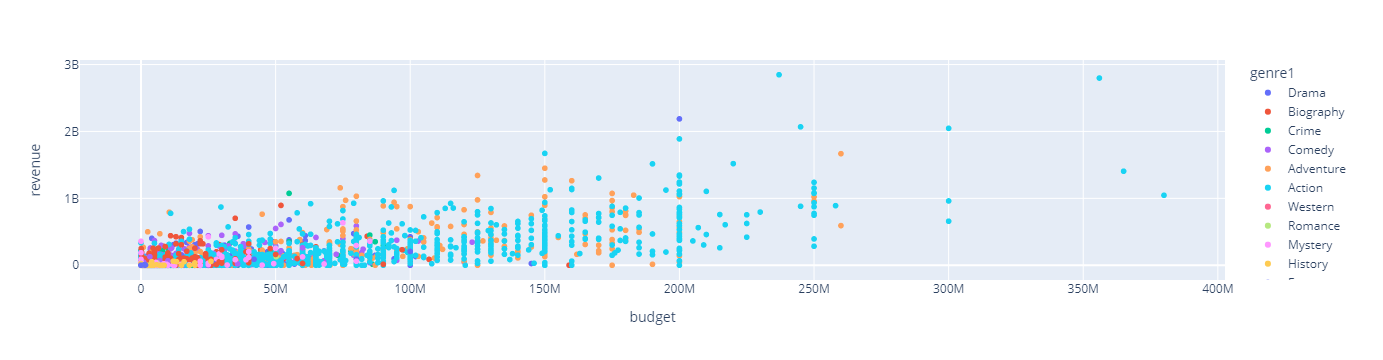

In [5]:
fig = px.scatter(df, x='budget', y= 'revenue', color='genre1')
fig.show()

In [6]:
dfg = df.groupby(['startYear', 'genre1']).agg({'budget': ['sum', 'mean'], 'revenue': ['sum', 'mean'] })
dfg.columns = ['budget_sum','budget_mean', 'revenue_sum','revenue_mean']
dfg.reset_index(inplace=True)
dfg.head()

,startYear,genre1,budget_sum,budget_mean,revenue_sum,revenue_mean
0,1907,Biography,0.0,0.0,0.0,0.0
1,1907,Drama,0.0,0.0,0.0,0.0
2,1910,Drama,0.0,0.0,0.0,0.0
3,1911,Drama,0.0,0.0,0.0,0.0
4,1912,Crime,0.0,0.0,0.0,0.0


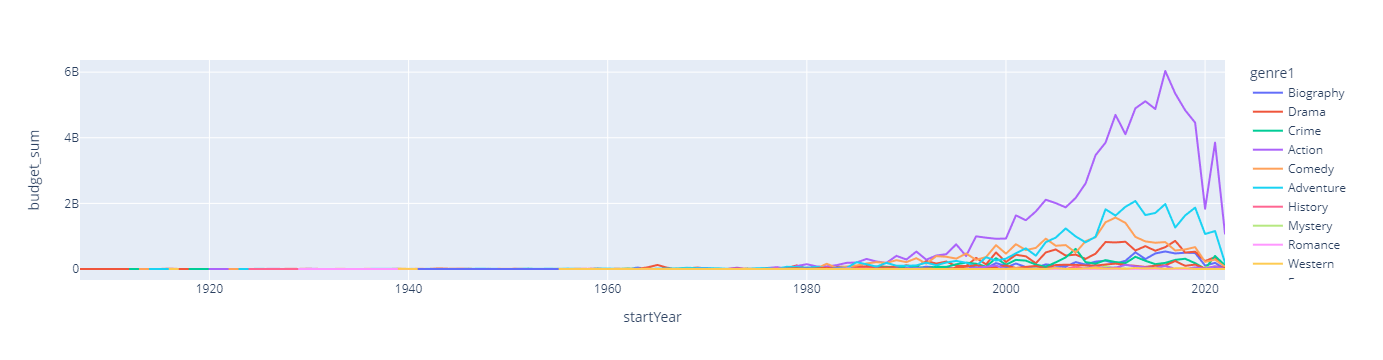

In [7]:
fig = px.line(dfg, x= 'startYear',y='budget_sum', color='genre1')
fig.show()

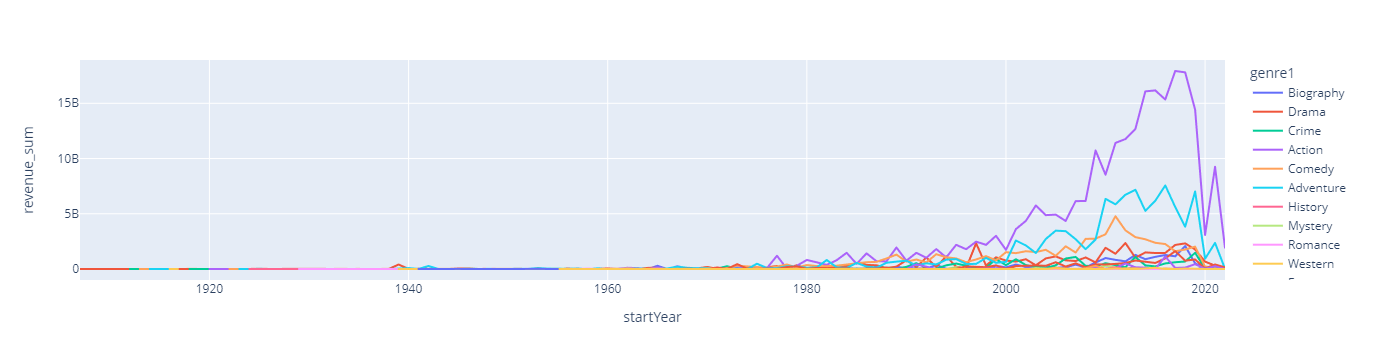

In [8]:
fig = px.line(dfg, x= 'startYear', y='revenue_sum',color='genre1')
fig.show()